In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import cv2
import os
import PIL
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data=datasets.cifar10.load_data()

In [3]:
(x_train,y_train),(x_test,y_test)=data

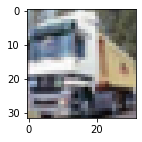

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1])

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

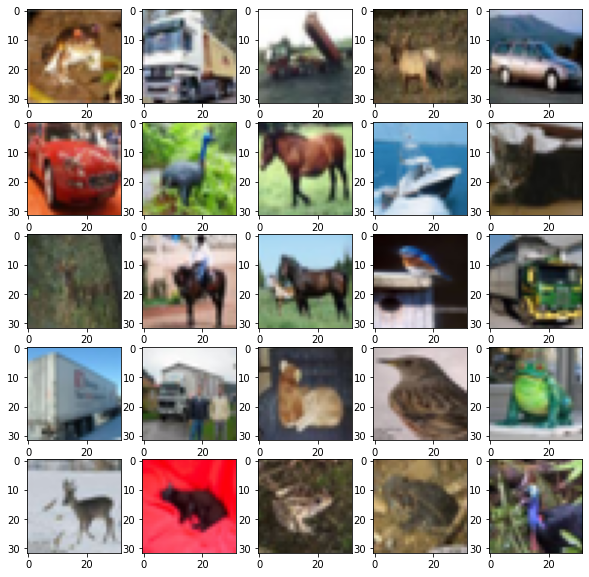

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.binary)


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
def sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

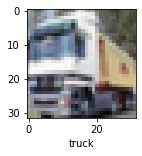

In [12]:
sample(x_train,y_train,1)

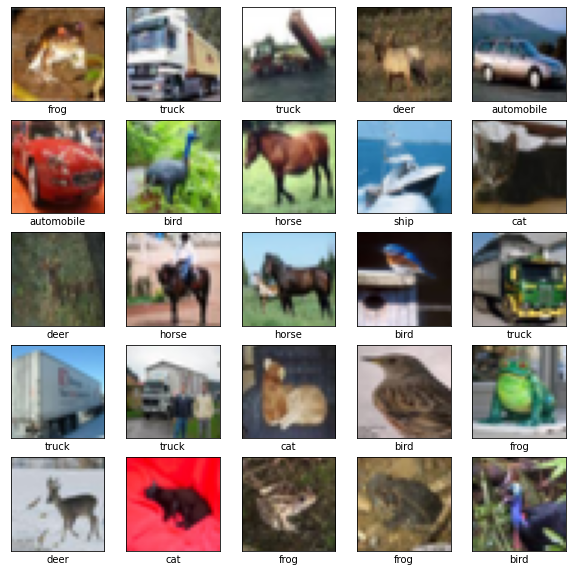

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[y_train[i]])

In [14]:
x_train=x_train/255

In [15]:
x_test=x_test/255
y_train_categorical=keras.utils.to_categorical(
              y_train,num_classes=10,dtype="float32")
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation="relu"),
        keras.layers.Dense(1000,activation="relu"),
        keras.layers.Dense(10,activation="sigmoid")
])
ann.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
with tf.device("/GPU:0"):
    ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.8582 - accuracy: 0.3333
Epoch 2/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6559 - accuracy: 0.41310s - loss: 1.6560 - accu
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5684 - accuracy: 0.4451
Epoch 4/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5076 - accuracy: 0.46820s - loss: 1.5079 - accuracy
Epoch 5/5
1563/1563 [==============================] - ETA: 0s - loss: 1.4548 - accuracy: 0.4872 ETA: 1s - loss: 1.4553 - ac - ETA: 0s - l - 92s 59ms/step - loss: 1.4548 - accuracy: 0.4872


In [24]:
cnn=models.Sequential([
    #filters mean how many different points for classification you want
    #kernal size means which size filter matrix grim box you want to use
    #softmax,it does suppose i have 2 class having different probability,it will narmalize it,ex-class1=0.33
                                                                                            #    class2=0.37,after using softmax
                                                                                # it gives for class1 0.33/0.33+0.37
    #conv+pooling
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4494 - accuracy: 0.4813
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0990 - accuracy: 0.6167
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9689 - accuracy: 0.6640
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8887 - accuracy: 0.6918
Epoch 5/5
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8233 - accuracy: 0.7159


In [26]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9266 - accuracy: 0.6865


[0.9265769720077515, 0.6865000128746033]

In [27]:
y_pred=cnn.predict(x_test)

In [32]:
#argmax give index of maximum number
y_classes=[np.argmax(element) for element in y_pred]

In [33]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [34]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

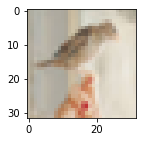

In [39]:
sample(x_test,y_test,156)

In [40]:
classes[y_classes[156]]

'bird'

In [43]:
print("classification Report:\n",classification_report(y_test,y_classes))

classification Report:
               precision    recall  f1-score   support

           0       0.61      0.84      0.71      1000
           1       0.73      0.86      0.79      1000
           2       0.56      0.60      0.58      1000
           3       0.59      0.36      0.45      1000
           4       0.65      0.63      0.64      1000
           5       0.61      0.59      0.60      1000
           6       0.71      0.80      0.75      1000
           7       0.78      0.71      0.75      1000
           8       0.80      0.78      0.79      1000
           9       0.84      0.68      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



#     For mnist dataset

In [12]:
data=keras.datasets.mnist.load_data()

In [28]:
(x_train,y_train),(x_test,y_test)=data

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
x_test.shape

(10000, 28, 28)

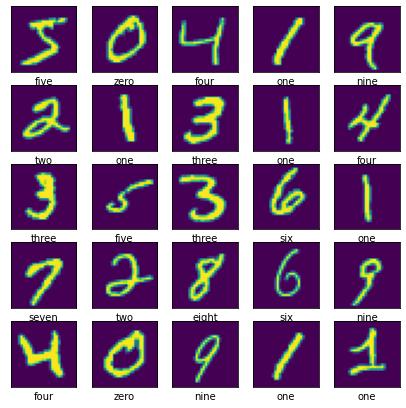

In [33]:
plt.figure(figsize=(7,7))
for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_train[i])
        plt.xlabel(names[y_train[i]])
    

In [32]:
names=["zero","one","two","three","four","five","six","seven","eight","nine"]

In [34]:
x_train=x_train/255
x_test=x_test/255

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
y_test.shape

(10000,)

In [38]:
x_train1=x_train.reshape(-1,28,28,1)
x_test1=x_test.reshape(-1,28,28,1)

In [39]:
x_test1.shape
x_train1.shape

(60000, 28, 28, 1)

In [57]:
mode1l=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train1,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 2/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0103 - accuracy: 0.9966


In [59]:
model.evaluate(x_test1,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0413 - accuracy: 0.9875


[0.04133104905486107, 0.987500011920929]

In [58]:
cnn=models.Sequential([
    layers.Conv2D(filters=30,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=46,kernel_size=(2,2),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
cnn.fit(x_train1,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1704 - accuracy: 0.9481
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0555 - accuracy: 0.9829
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0234 - accuracy: 0.9924


In [60]:
cnn.evaluate(x_test1,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0309 - accuracy: 0.9900


[0.030871927738189697, 0.9900000095367432]

# Data Augmentatiom(Generating new samples using training set)

In [1]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [7]:
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses=list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

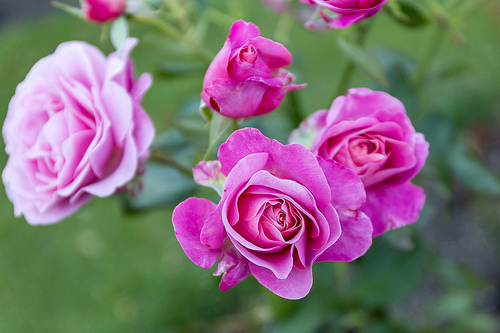

In [8]:
PIL.Image.open(str(roses[9]))

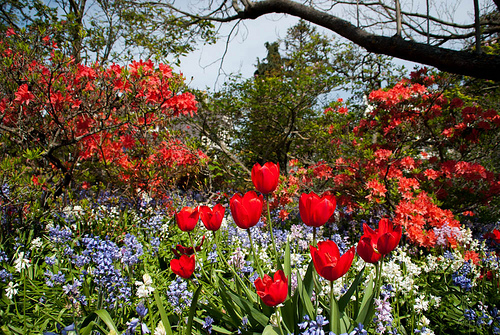

In [9]:
tulips=list(data_dir.glob("tulips/*"))
PIL.Image.open(tulips[5])

In [10]:
flowers_images_dict={
    "roses":list(data_dir.glob("roses/*")),
    "daisy":list(data_dir.glob("daisy/*")),
    "dendelian":list(data_dir.glob("dendelin/*")),
    "sunflower":list(data_dir.glob("sunflower/*")),
    "tulips":list(data_dir.glob("tulips/*"))
}

In [11]:
flowers_images_dict["daisy"]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [12]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelom":2,
    "sunflower":3,
    "tulips":4,
}

In [13]:
img=cv2.imread(flowers_images_dict["tulips"][0])

SystemError: <built-in function imread> returned NULL without setting an error

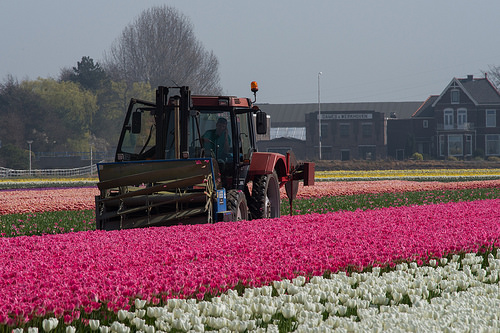

In [14]:
img=cv2.imread(str(flowers_images_dict["roses"][0]))
PIL.Image.open(tulips[89])

In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [17]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(100,100))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
x=np.array(x)
y=np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [20]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
model=Sequential([
    layers.Conv2D(filters=20,kernel_size=3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=40,kernel_size=3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=60,kernel_size=3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(500,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(5)
    
])
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logists=True),
              metrics=["accuracy"])
model.fit(x_train_scaled,y_train,epochs=10)

In [39]:
model.evaluate(x_test_scaled,y_test)

17/17 [==============================] - 1s 79ms/step - loss: 1.1431 - accuracy: 0.6975 0s - loss: 1.0753 - accuracy: 


[1.143081784248352, 0.69749516248703]

In [40]:
predictions=model.predict(x_test_scaled)
predictions

array([[  2.9980388 ,   4.3658824 , -14.804835  , -11.413029  ,
          7.0745883 ],
       [  2.9027574 ,   2.9419346 ,  -6.0565934 ,  -5.619299  ,
          0.55998194],
       [ -0.78424466,  10.251951  , -14.734142  , -10.835579  ,
          6.111938  ],
       ...,
       [ 11.194576  ,  -0.24330784, -14.122956  , -13.099579  ,
          4.2530117 ],
       [  6.450158  ,   8.215696  , -15.919345  , -13.601684  ,
          1.8368579 ],
       [  3.5235028 ,  -3.0015137 ,  -7.5127587 ,  -5.441678  ,
          4.554615  ]], dtype=float32)

In [41]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.5657142e-02, 6.1483618e-02, 2.9041747e-10, 8.6310816e-09,
       9.2285925e-01], dtype=float32)>

In [42]:
np.argmax([0,78,123,8])

2

In [43]:
np.argmax(score)

4

In [44]:
y_test[0]

4

In [58]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
])

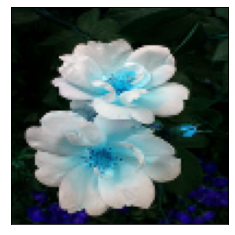

In [49]:
plt.xticks([])
plt.yticks([])
plt.imshow(x[0])

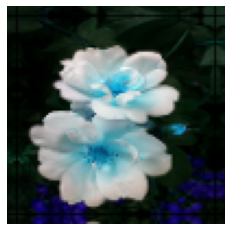

In [57]:
plt.axis("off")
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

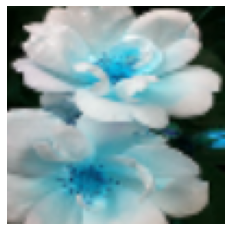

In [59]:
plt.axis("off")
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

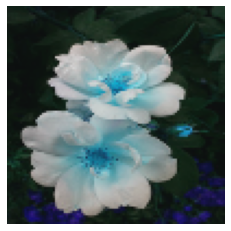

In [64]:
data_augmentation1=keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])
plt.axis("off")
plt.imshow(data_augmentation1(x)[0].numpy().astype("uint8"))

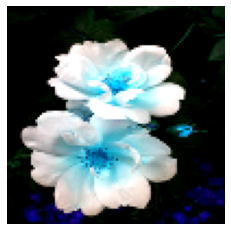

In [70]:

plt.axis("off")
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))


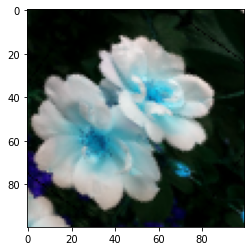

In [72]:
data_augmentation1=keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3)
])
plt.imshow(data_augmentation1(x)[0].numpy().astype("uint8"))

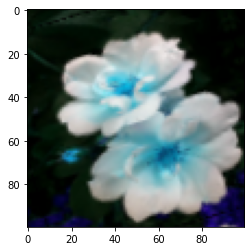

In [83]:
data_augmentation3=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])
plt.imshow(data_augmentation3(x)[0].numpy().astype("uint8"))

In [87]:
model=Sequential([
    data_augmentation3,
    layers.Conv2D(filters=40,kernel_size=3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=60,kernel_size=3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=90,kernel_size=3,padding="same",activation="relu"),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(5000,activation="relu"),
    layers.Dense(500,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(5)
    
])
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
49/49 [==============================] - 44s 893ms/step - loss: 1.2361 - accuracy: 0.4247
Epoch 2/10
49/49 [==============================] - 44s 893ms/step - loss: 0.8453 - accuracy: 0.5985
Epoch 3/10
49/49 [==============================] - 44s 896ms/step - loss: 0.7949 - accuracy: 0.6371
Epoch 4/10
49/49 [==============================] - 44s 896ms/step - loss: 0.7733 - accuracy: 0.6454
Epoch 5/10
49/49 [==============================] - 44s 894ms/step - loss: 0.7395 - accuracy: 0.6538
Epoch 6/10
49/49 [==============================] - 44s 895ms/step - loss: 0.6891 - accuracy: 0.6885
Epoch 7/10
49/49 [==============================] - 44s 896ms/step - loss: 0.6773 - accuracy: 0.6937
Epoch 8/10
49/49 [==============================] - 44s 897ms/step - loss: 0.6667 - accuracy: 0.6931
Epoch 9/10
49/49 [==============================] - 44s 889ms/step - loss: 0.6043 - accuracy: 0.7310
Epoch 10/10
49/49 [==============================] - 43s 888ms/step - loss: 0.6034 - accura

In [88]:
model.evaluate(x_test_scaled,y_test)

17/17 [==============================] - 3s 159ms/step - loss: 0.6719 - accuracy: 0.7264


[0.6719196438789368, 0.726396918296814]

# Load Digits Set

In [2]:
from sklearn.datasets import load_digits

In [3]:
df1=load_digits()

In [12]:
dir(df1)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [17]:
df1.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

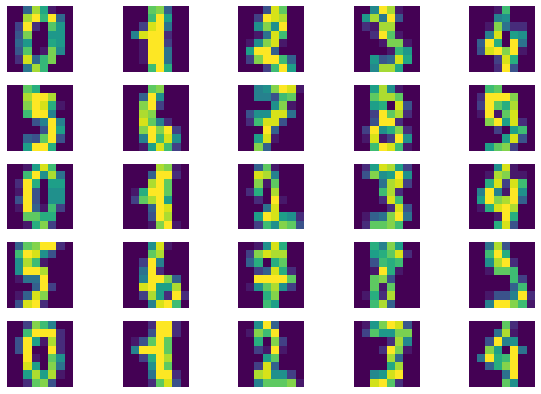

In [28]:
plt.figure(figsize=(10,7))
for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.imshow(df1.images[i])
    plt.axis(False)


In [45]:
x_train,x_test,y_train,y_test=train_test_split(df1.data,df1.target,test_size=0.25)

In [46]:
print(len(x_train),len(y_train))

1347 1347


In [47]:
print(len(x_test),len(y_test))

450 450


In [48]:
x_train.shape

(1347, 64)

In [49]:
y_train.shape

(1347,)

In [127]:
model=keras.Sequential([
    
    keras.layers.Dense(600,input_shape=(x_train.shape)),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 0.9235 - accuracy: 0.6533
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9295
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1276 - accuracy: 0.9562
Epoch 4/10
43/43 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9777
Epoch 5/10
43/43 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9852
Epoch 6/10
43/43 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9844
Epoch 7/10
43/43 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9896: 0s - loss: 0.0363 - accuracy
Epoch 8/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9792
Epoch 9/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9852
Epoch 10/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0328 - accura

In [95]:
model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9756


[0.1574544459581375, 0.9755555391311646]

In [70]:
model1=Ridge(alpha=100,max_iter=200,tol=0.1)
model1.fit(x_train,y_train)

Ridge(alpha=100, max_iter=200, tol=0.1)

In [88]:
model2=Lasso(alpha=1,max_iter=100,tol=0.5)
model2.fit(x_train,y_train)

Lasso(alpha=1, max_iter=100, tol=0.5)

In [54]:
print(model1.score(x_test,y_test),model1.score(x_train,y_train))

0.5335227962683877 0.6123399208929771


In [73]:
print(model1.score(x_test,y_test),model1.score(x_train,y_train))

0.5260340062061029 0.6114225013036565


In [89]:
print(model2.score(x_test,y_test),model2.score(x_train,y_train))

0.42532513128152216 0.47029409925683796


In [98]:
x_train.shape

(1347, 64)

In [105]:
x_train1=x_train.reshape(-1,8,8,1)
x_train1.shape

(1347, 8, 8, 1)

In [123]:
y_train1=y_train.reshape(-1,1,1,1)

In [137]:
y_train.shape

(1347,)

In [150]:
model4=keras.Sequential([
    keras.layers.Conv2D(filters=50,kernel_size=3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=70,kernel_size=2,padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(input_shape=(x_train1.shape)),
    keras.layers.Dense(500),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model4.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model4.fit(x_train1,y_train,epochs=100)

Epoch 1/100
43/43 [==============================] - 0s 9ms/step - loss: 1.9523 - accuracy: 0.3036
Epoch 2/100
43/43 [==============================] - 1s 13ms/step - loss: 0.9621 - accuracy: 0.7164
Epoch 3/100
43/43 [==============================] - 1s 14ms/step - loss: 0.3777 - accuracy: 0.8827
Epoch 4/100
43/43 [==============================] - 1s 16ms/step - loss: 0.1780 - accuracy: 0.9458
Epoch 5/100
43/43 [==============================] - 1s 17ms/step - loss: 0.1635 - accuracy: 0.9495
Epoch 6/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0853 - accuracy: 0.9740 0s - loss: 0.0984 - accu
Epoch 7/100
43/43 [==============================] - 1s 18ms/step - loss: 0.0637 - accuracy: 0.9748
Epoch 8/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0785 - accuracy: 0.9725
Epoch 9/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0715 - accuracy: 0.9733
Epoch 10/100
43/43 [==============================] - 1s 17ms/step - loss: 0

In [151]:
model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9711


[0.11612138897180557, 0.9711111187934875]